# Test some detection models on Pascal VOC Dataset

In [1]:
#!pip install matplotlib && pip install torchvision -U && pip install sklearn && pip install pandas && pip install pytorch-ignite -U

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchvision.models import detection
import utils as U
import dataset_utils as DU

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device :",device)

device : cpu


## Datasets 

In [3]:
# Dataset save folder
dataroot_voc_detection = '/data/voc2012_detection'
# Random images folder
rand_images = 'datasets/image_perso'

### Transforms datasets

In [4]:
size = (480,480)
transform_input = transforms.Compose([
                                   #transforms.Resize(size),
                                   transforms.ToTensor(),
                                   #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                    ])

transform_bbox = transforms.Compose([
                                   transforms.Resize(size),
                                   #transforms.Lambda(to_tensor_target)
                                   ])

### Load VOC Dataset

In [6]:
train_dataset = dset.VOCDetection(dataroot_voc_detection,year='2012', image_set='train',download=True\
                                     ,transform = transform_input)#, target_transform = transform_bbox)
val_dataset = dset.VOCDetection(dataroot_voc_detection,year='2012', image_set='val',download=True\
                                     ,transform = transform_input)#, target_transform = transform_bbox)

Using downloaded and verified file: /data/voc2012_detection/VOCtrainval_11-May-2012.tar
Using downloaded and verified file: /data/voc2012_detection/VOCtrainval_11-May-2012.tar


In [7]:
print("Taille dataset train VOC :",len(train_dataset))
print("Taille dataset val VOC :",len(val_dataset))

Taille dataset train VOC : 5717
Taille dataset val VOC : 5823


### Plot

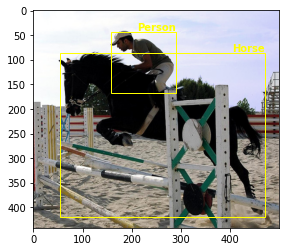

In [8]:
sample = train_dataset.__getitem__(0)
image, bbox = sample[0], sample[1]
DU.print_image_bbox_GT(image,bbox)

### Load random images

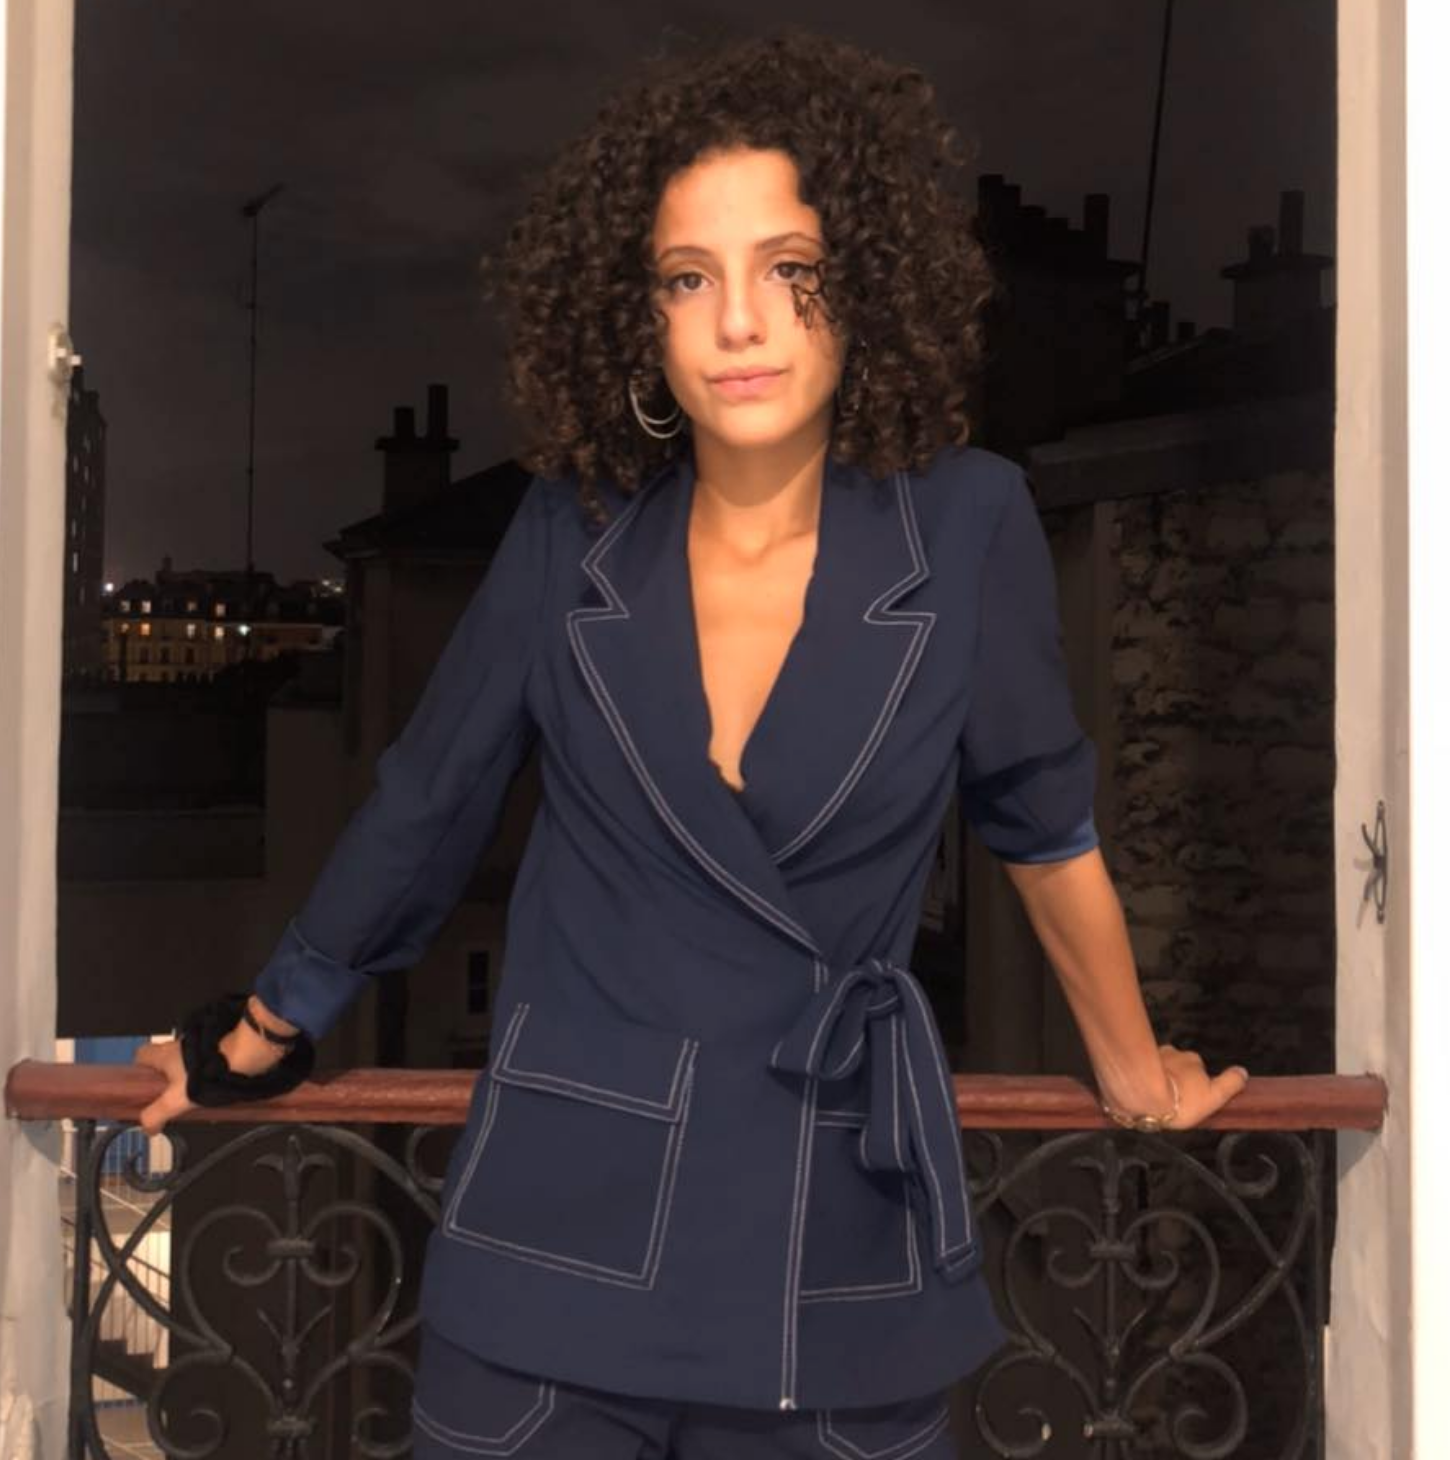

In [5]:
x = DU.load_images(rand_images,'leyna.jpg',size_img=size,normalize=False,print=True)

## Model

### Faster R-CNN

In [6]:
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
       

In [10]:
model.eval()

In [ ]:
# Get Image of commun dataset
img,GT = train_dataset.__getitem__(0)
y = model(img.unsqueeze(0).to(device))

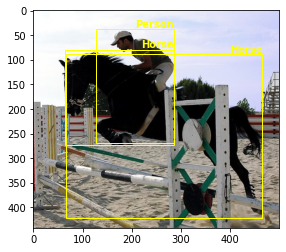

In [17]:
DU.print_image_bbox_prediction(img,y[0],threshold=0.8)

In [7]:
# Pred of random images
model.eval()
y = model(x)

In [8]:
y

[{'boxes': tensor([[ 46.8088,  17.6625, 424.8810, 472.1635],
          [ 19.3583, 346.9661, 161.9120, 478.5800],
          [317.4612, 368.1831, 446.3074, 479.4669],
          [ 31.0238, 331.2072, 456.9283, 468.8018],
          [448.0751, 264.7460, 460.1154, 306.0090],
          [ 86.7790, 265.8955, 382.7153, 392.7104],
          [ 29.4439, 359.9208, 153.5636, 478.4676],
          [  3.6222, 347.2279,  56.1143, 473.8470],
          [138.7724, 220.8513, 328.9599, 457.7758],
          [ 52.4397, 344.0295, 163.6265, 376.3939],
          [314.0572, 352.3242, 375.3548, 372.0806],
          [ 55.5274, 280.2066, 434.0891, 474.0523],
          [124.4945, 264.2452, 170.0188, 355.0938],
          [315.5718, 352.5354, 373.5349, 372.2914],
          [313.2997, 346.7726, 449.9336, 480.0000],
          [314.4806, 349.9000, 420.0449, 375.8948],
          [311.2078, 349.0150, 451.0551, 375.2921],
          [ 92.7183, 343.5640, 339.7283, 478.2651],
          [315.8522, 349.2855, 441.4060, 375.2485],
   

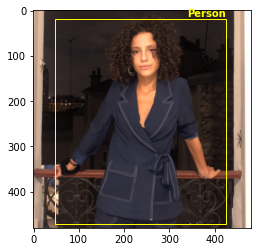

In [9]:
DU.print_image_bbox_prediction(x[0],y[0],threshold=0.7,color='yellow')